In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Assignment: Airbnb Rental Price Prediction 

Objective 

You are given the Airbnb NYC dataset. Your task is to predict the rental price (price column) of an Airbnb listing based on various features such as neighborhood, room type, number of reviews, and availability. 

Shape Assignment Tasks 

Part A: Data Understanding & Cleaning 

Load the dataset in Pandas and explore it (.head(), .info(), .describe()). 





In [2]:
data = pd.read_csv('data/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
data.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Remove or treat outliers in the price column (hint: listings with price = 0 or extremely high values). 



In [6]:
data.drop(data[data['price']==0].index,inplace=True)
data.drop(data[data['price']>250].index,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43676 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43676 non-null  int64  
 1   name                            43662 non-null  object 
 2   host_id                         43676 non-null  int64  
 3   host_name                       43656 non-null  object 
 4   neighbourhood_group             43676 non-null  object 
 5   neighbourhood                   43676 non-null  object 
 6   latitude                        43676 non-null  float64
 7   longitude                       43676 non-null  float64
 8   room_type                       43676 non-null  object 
 9   price                           43676 non-null  int64  
 10  minimum_nights                  43676 non-null  int64  
 11  number_of_reviews               43676 non-null  int64  
 12  last_review                     35302

Identify and handle missing values. 



In [7]:
data[data.select_dtypes(include=['number']).columns] = data.select_dtypes(include=['number'])\
                                                    .fillna(data.select_dtypes(include=['number'])\
                                                    .mean(),inplace=False)

In [8]:
# data.select_dtypes(include='number').info()
# temp2.info()
# temp = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())
# temp.info()
# data.select_dtypes(include='number').info()
# data.info()
# data.drop(['price','name','host_name','neighbourhood','last_review'],axis=1).info()

Encode categorical variables like neighbourhood_group and room_type. 

In [9]:
y = data['price']
x = data.drop(['price','name','host_name','neighbourhood','last_review'],axis=1)
x = pd.get_dummies(x, drop_first=True)
x.info()
# np.isnan(x).sum()

<class 'pandas.core.frame.DataFrame'>
Index: 43676 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 43676 non-null  int64  
 1   host_id                            43676 non-null  int64  
 2   latitude                           43676 non-null  float64
 3   longitude                          43676 non-null  float64
 4   minimum_nights                     43676 non-null  int64  
 5   number_of_reviews                  43676 non-null  int64  
 6   reviews_per_month                  43676 non-null  float64
 7   calculated_host_listings_count     43676 non-null  int64  
 8   availability_365                   43676 non-null  int64  
 9   neighbourhood_group_Brooklyn       43676 non-null  bool   
 10  neighbourhood_group_Manhattan      43676 non-null  bool   
 11  neighbourhood_group_Queens         43676 non-null  bool   


Part B: Exploratory Data Analysis (EDA)

Create a histogram of prices – does the distribution look normal or skewed?

<Axes: ylabel='Frequency'>

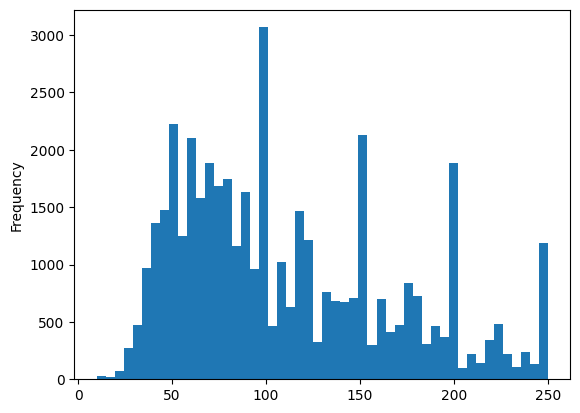

In [10]:
data['price'].plot(kind='hist',bins=50)


Show the top 10 neighbourhoods with the highest average prices.

In [11]:
data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

neighbourhood
Willowbrook           249.000000
Breezy Point          213.333333
Neponsit              200.000000
NoHo                  182.977273
West Village          176.138739
DUMBO                 170.322581
Financial District    170.059441
Tribeca               164.166667
Murray Hill           164.134409
Flatiron District     163.318182
Name: price, dtype: float64


Use a heatmap (correlation matrix) to check relationships between numerical features.

<Axes: >

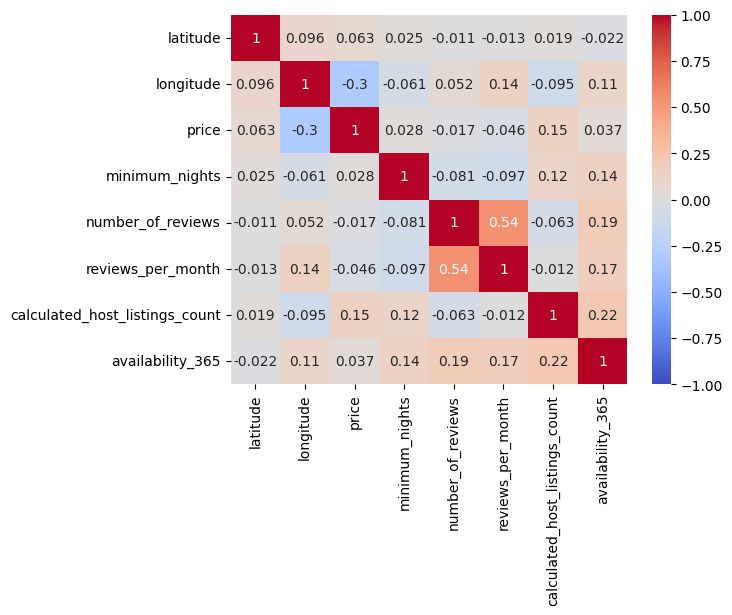

In [12]:

sns.heatmap(data.select_dtypes(include=['number']).drop(['id','host_id'], axis=1).corr(), annot=True, cmap='coolwarm', vmin=-1)


Plot average price vs room_type using a bar chart.

<Axes: xlabel='room_type'>

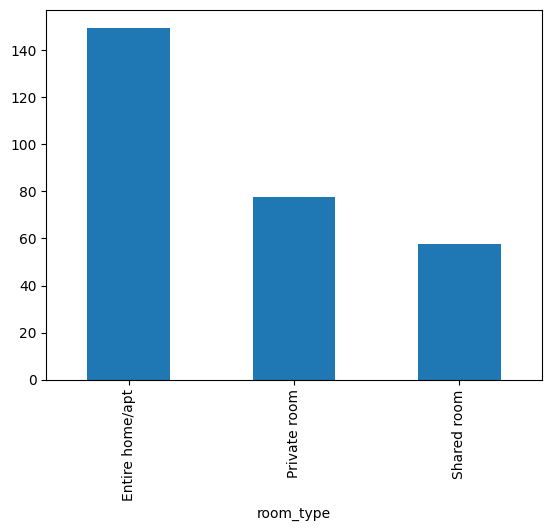

In [13]:
data.groupby('room_type')['price'].mean().plot(kind='bar')

Part C: Feature Engineering & Scaling

Select useful features (location, room type, reviews, availability, etc.) for prediction.


Apply different scaling methods (StandardScaler, MinMaxScaler) and compare their effect.

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

In [16]:
np.isnan(x_scaled)
np.isnan(x).sum()

id                                   0
host_id                              0
latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

Part D: Model Training & Evaluation

Split the dataset into train/test sets (e.g., 80/20).

In [17]:
am = x.shape[0]
split = int(am*0.8)
x_train, x_test = x_scaled[:split], x_scaled[split:]    
y_train, y_test = y_scaled[:split], y_scaled[split:]

Train and evaluate the following regression models:

Linear Regression

In [18]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [19]:
def results(model_type):
    model = model_type
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred)**.5
    R2 = r2_score(y_test, y_pred)
    print(str(model_type)[:-2])
    print('MAE:', MAE)
    print('MSE:', MSE) 
    print('RMSE:', RMSE)
    print('R2:', R2)
    return [MAE, MSE, RMSE, R2]

In [20]:
lin_reg_results = results(LinearRegression())

LinearRegression
MAE: 0.545526996439164
MSE: 0.5151149191497347
RMSE: 0.7177150682197878
R2: 0.5485335661286472


Ridge & Lasso Regression

In [21]:
from sklearn.linear_model import Ridge, Lasso
ridge_results = results(Ridge())
lasso_results = results(Lasso())

Ridge
MAE: 0.5455292144176775
MSE: 0.5151182685671603
RMSE: 0.7177174016053675
R2: 0.5485306305709989
Lasso
MAE: 0.8989260575506138
MSE: 1.1411770843393474
RMSE: 1.068258903234299
R2: -0.0001712812605076941


Decision Tree Regressor

In [22]:

from sklearn.tree import DecisionTreeRegressor

In [23]:
tree_results = results(DecisionTreeRegressor())

DecisionTreeRegressor
MAE: 0.8109216528341341
MSE: 1.169680362802992
RMSE: 1.0815176201999632
R2: -0.02515264561870678


Random Forest Regressor

In [24]:

from sklearn.ensemble import RandomForestRegressor

In [25]:
forest_results = results(RandomForestRegressor(n_estimators=100, max_depth=10))

C:\Users\Mikael Huff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=1
MAE: 0.5462408941815281
MSE: 0.4878811571476452
RMSE: 0.6984849011593917
R2: 0.5724022776625304


Support Vector Regressor (SVR)

In [26]:

from sklearn.svm import LinearSVR

In [27]:
svr_results = results(LinearSVR())

C:\Users\Mikael Huff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR
MAE: 0.5378542264665783
MSE: 0.5423035820640916
RMSE: 0.736412643878479
R2: 0.5247043811616576


C:\Users\Mikael Huff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Gradient Boosting / XGBoost

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
xgboost_results = results(GradientBoostingRegressor())

C:\Users\Mikael Huff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor
MAE: 0.5234920030991119
MSE: 0.45124201814043213
RMSE: 0.671745501019867
R2: 0.6045142216438985


Evaluate models using:

MAE (Mean Absolute Error)

MSE (Mean Squared Error)

RMSE (Root Mean Squared Error)

R² Score

Part E: Comparison & Conclusion
Create a comparison table of model performance (MAE, RMSE, R²).
Write a short conclusion:
Which model performed best?
Why might that model be more suitable for this dataset?
How could you improve predictions further (feature engineering, outlier handling, advanced models)?

In [48]:

plt.rcParams['figure.figsize'] = [10,5]

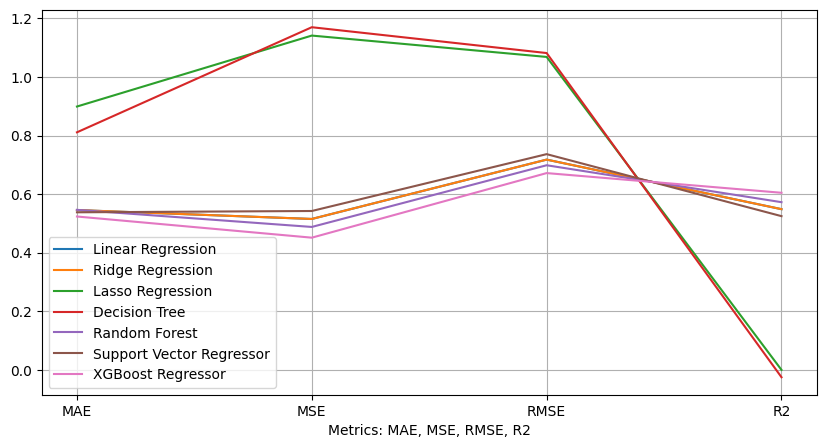

In [49]:
plt.plot(lin_reg_results, label='Linear Regression')
plt.plot(ridge_results, label='Ridge Regression')
plt.plot(lasso_results, label='Lasso Regression')
plt.plot(tree_results, label='Decision Tree')
plt.plot(forest_results, label='Random Forest')
plt.plot(svr_results, label='Support Vector Regressor')
plt.plot(xgboost_results, label='XGBoost Regressor')
plt.xlabel('Metrics: MAE, MSE, RMSE, R2')
plt.xticks(ticks=[0, 1, 2, 3], labels=['MAE', 'MSE', 'RMSE', 'R2'])
plt.legend()
plt.grid()
plt.show()

The best model was the Gradient Boosted Regressor